In [3]:
import astropy.constants as c
import astropy.units as u
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Section 1: Statistics of the Data Cube

## Q1

In [4]:
hdul = fits.open('/Users/simonsmith/Documents/SURP/HC2/HC2_HC5N_all_rebase3_trim.fits')
head = hdul[0].header
data = hdul[0].data

In [5]:
head

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  330                                                  
NAXIS2  =                  524                                                  
NAXIS3  =                  334                                                  
BUNIT   = '' / Tmb                                                              
INSTRUME= 'KFPA    '                                                            
BMAJ    = 0.008458002825349066                                                  
BMIN    = 0.008458002825349066                                                  
BPA     =                  0.0                                                  
TELESCOP= 'GBT     '                                                            
WCSAXES =                   

## Q2

In [6]:
x_pix, y_pix, z_pix = head['NAXIS1'], head['NAXIS2'], head['NAXIS3']
x_deg, y_deg = x_pix*head['CDELT1']*u.deg, y_pix*head['CDELT2']*u.deg

x_pc, y_pc = (x_deg.to(u.rad)*140*u.pc)/u.rad, (y_deg.to(u.rad)*140*u.pc)/u.rad
x_au, y_au = x_pc.to(u.au), y_pc.to(u.au)

d_freq = head['CDELT3']*u.Hz
d_v = (c.c*(d_freq/(head['RESTFRQ']*u.Hz))).to(u.m/u.s)

rad_v = []
freqs = []
for i in range(z_pix):
    freq = head['CRVAL3']*u.Hz - (i-head['CRPIX3'])*d_freq
    freqs.append(freq/u.Hz)
    rad_v.append((c.c*(1 - freq/(head['RESTFRQ']*u.Hz))).to(u.m/u.s)/(u.m/u.s))
    
rad_v = np.asarray(rad_v)
freqs = np.asarray(freqs)

## Q3

In [7]:
std = np.std(data, axis=0)

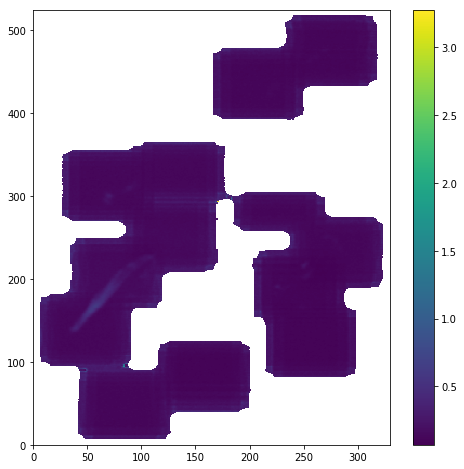

In [8]:
plt.figure(figsize=(8,8))
plt.pcolormesh(std)
plt.colorbar()
plt.show()

## Q4

In [9]:
def int_pix(data, x, y):
    return data.T[x][y]

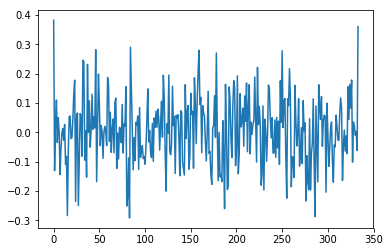

In [10]:
plt.plot(int_pix(data, 32, 151))

In [11]:
spec = int_pix(data, 32, 151)

In [12]:
sig.find_peaks(spec, 2)

(array([], dtype=int64), {'peak_heights': array([], dtype=float64)})

In [198]:
peak = int(np.where(spec == np.max(spec))[0])

if peak == len(spec)-1:
    peak = int(np.where(spec == np.max(spec[:len(spec)-2]))[0])

peaks = sig.peak_widths(spec, [peak])

In [199]:
peaks

(array([1.70992712]),
 array([0.17241107]),
 array([310.26308492]),
 array([311.97301205]))

In [134]:

half_width = int(np.round(peaks[0][0])/2)
left, right = int(np.floor(peaks[2][0]) - half_width), int(np.ceil(peaks[3][0]) + half_width)

In [135]:
new_spec = np.asarray(spec[:left].tolist()+spec[right:].tolist())

In [136]:
np.std(spec), np.std(new_spec)

(0.2863800725276555, 0.14983804474883186)

In [209]:
def mask_std(data):
    mask = np.zeros(np.sum(data, axis=0).shape).T
    for i in range(data.T.shape[0]):
        for j in range(data.T.shape[1]):
            spec = int_pix(data, i, j)
            print(i, j)
            try:
                peak = int(np.where(spec == np.max(spec))[0])

                if peak == len(spec)-1:
                    peak = int(np.where(spec == np.max(spec[:len(spec)-2]))[0])
                elif peak == 0:
                    peak = int(np.where(spec == np.max(spec[1:]))[0])

                peaks = sig.peak_widths(spec, [peak])
                half_width = int(np.round(peaks[0][0])/2)
                left, right = int(np.floor(peaks[2][0]) - half_width), int(np.ceil(peaks[3][0]) + half_width)           
                new_spec = np.asarray(spec[:left].tolist()+spec[right:].tolist())
            except TypeError:
                new_spec = np.array([np.nan])
            
            
            
            print(np.std(new_spec))
            mask[i][j] = np.std(new_spec)
            
    return mask
    
    
    

In [203]:
mask = np.zeros(np.sum(data, axis=0).shape)

In [204]:
mask.shape

(524, 330)

In [210]:
mask_std(data)

0 0
nan
0 1
nan
0 2
nan
0 3
nan
0 4
nan
0 5
nan
0 6
nan
0 7
nan
0 8
nan
0 9
nan
0 10
nan
0 11
nan
0 12
nan
0 13
nan
0 14
nan
0 15
nan
0 16
nan
0 17
nan
0 18
nan
0 19
nan
0 20
nan
0 21
nan
0 22
nan
0 23
nan
0 24
nan
0 25
nan
0 26
nan
0 27
nan
0 28
nan
0 29
nan
0 30
nan
0 31
nan
0 32
nan
0 33
nan
0 34
nan
0 35
nan
0 36
nan
0 37
nan
0 38
nan
0 39
nan
0 40
nan
0 41
nan
0 42
nan
0 43
nan
0 44
nan
0 45
nan
0 46
nan
0 47
nan
0 48
nan
0 49
nan
0 50
nan
0 51
nan
0 52
nan
0 53
nan
0 54
nan
0 55
nan
0 56
nan
0 57
nan
0 58
nan
0 59
nan
0 60
nan
0 61
nan
0 62
nan
0 63
nan
0 64
nan
0 65
nan
0 66
nan
0 67
nan
0 68
nan
0 69
nan
0 70
nan
0 71
nan
0 72
nan
0 73
nan
0 74
nan
0 75
nan
0 76
nan
0 77
nan
0 78
nan
0 79
nan
0 80
nan
0 81
nan
0 82
nan
0 83
nan
0 84
nan
0 85
nan
0 86
nan
0 87
nan
0 88
nan
0 89
nan
0 90
nan
0 91
nan
0 92
nan
0 93
nan
0 94
nan
0 95
nan
0 96
nan
0 97
nan
0 98
nan
0 99
nan
0 100
nan
0 101
nan
0 102
nan
0 103
nan
0 104
nan
0 105
nan
0 106
nan
0 107
nan
0 108
nan
0 109
nan
0 110
nan


2 31
nan
2 32
nan
2 33
nan
2 34
nan
2 35
nan
2 36
nan
2 37
nan
2 38
nan
2 39
nan
2 40
nan
2 41
nan
2 42
nan
2 43
nan
2 44
nan
2 45
nan
2 46
nan
2 47
nan
2 48
nan
2 49
nan
2 50
nan
2 51
nan
2 52
nan
2 53
nan
2 54
nan
2 55
nan
2 56
nan
2 57
nan
2 58
nan
2 59
nan
2 60
nan
2 61
nan
2 62
nan
2 63
nan
2 64
nan
2 65
nan
2 66
nan
2 67
nan
2 68
nan
2 69
nan
2 70
nan
2 71
nan
2 72
nan
2 73
nan
2 74
nan
2 75
nan
2 76
nan
2 77
nan
2 78
nan
2 79
nan
2 80
nan
2 81
nan
2 82
nan
2 83
nan
2 84
nan
2 85
nan
2 86
nan
2 87
nan
2 88
nan
2 89
nan
2 90
nan
2 91
nan
2 92
nan
2 93
nan
2 94
nan
2 95
nan
2 96
nan
2 97
nan
2 98
nan
2 99
nan
2 100
nan
2 101
nan
2 102
nan
2 103
nan
2 104
nan
2 105
nan
2 106
nan
2 107
nan
2 108
nan
2 109
nan
2 110
nan
2 111
nan
2 112
nan
2 113
nan
2 114
nan
2 115
nan
2 116
nan
2 117
nan
2 118
nan
2 119
nan
2 120
nan
2 121
nan
2 122
nan
2 123
nan
2 124
nan
2 125
nan
2 126
nan
2 127
nan
2 128
nan
2 129
nan
2 130
nan
2 131
nan
2 132
nan
2 133
nan
2 134
nan
2 135
nan
2 136
nan
2 137
nan

nan
4 186
nan
4 187
nan
4 188
nan
4 189
nan
4 190
nan
4 191
nan
4 192
nan
4 193
nan
4 194
nan
4 195
nan
4 196
nan
4 197
nan
4 198
nan
4 199
nan
4 200
nan
4 201
nan
4 202
nan
4 203
nan
4 204
nan
4 205
nan
4 206
nan
4 207
nan
4 208
nan
4 209
nan
4 210
nan
4 211
nan
4 212
nan
4 213
nan
4 214
nan
4 215
nan
4 216
nan
4 217
nan
4 218
nan
4 219
nan
4 220
nan
4 221
nan
4 222
nan
4 223
nan
4 224
nan
4 225
nan
4 226
nan
4 227
nan
4 228
nan
4 229
nan
4 230
nan
4 231
nan
4 232
nan
4 233
nan
4 234
nan
4 235
nan
4 236
nan
4 237
nan
4 238
nan
4 239
nan
4 240
nan
4 241
nan
4 242
nan
4 243
nan
4 244
nan
4 245
nan
4 246
nan
4 247
nan
4 248
nan
4 249
nan
4 250
nan
4 251
nan
4 252
nan
4 253
nan
4 254
nan
4 255
nan
4 256
nan
4 257
nan
4 258
nan
4 259
nan
4 260
nan
4 261
nan
4 262
nan
4 263
nan
4 264
nan
4 265
nan
4 266
nan
4 267
nan
4 268
nan
4 269
nan
4 270
nan
4 271
nan
4 272
nan
4 273
nan
4 274
nan
4 275
nan
4 276
nan
4 277
nan
4 278
nan
4 279
nan
4 280
nan
4 281
nan
4 282
nan
4 283
nan
4 284
nan
4 285


6 193
nan
6 194
nan
6 195
nan
6 196
nan
6 197
nan
6 198
nan
6 199
nan
6 200
nan
6 201
nan
6 202
nan
6 203
nan
6 204
nan
6 205
nan
6 206
nan
6 207
nan
6 208
nan
6 209
nan
6 210
nan
6 211
nan
6 212
nan
6 213
nan
6 214
nan
6 215
nan
6 216
nan
6 217
nan
6 218
nan
6 219
nan
6 220
nan
6 221
nan
6 222
nan
6 223
nan
6 224
nan
6 225
nan
6 226
nan
6 227
nan
6 228
nan
6 229
nan
6 230
nan
6 231
nan
6 232
nan
6 233
nan
6 234
nan
6 235
nan
6 236
nan
6 237
nan
6 238
nan
6 239
nan
6 240
nan
6 241
nan
6 242
nan
6 243
nan
6 244
nan
6 245
nan
6 246
nan
6 247
nan
6 248
nan
6 249
nan
6 250
nan
6 251
nan
6 252
nan
6 253
nan
6 254
nan
6 255
nan
6 256
nan
6 257
nan
6 258
nan
6 259
nan
6 260
nan
6 261
nan
6 262
nan
6 263
nan
6 264
nan
6 265
nan
6 266
nan
6 267
nan
6 268
nan
6 269
nan
6 270
nan
6 271
nan
6 272
nan
6 273
nan
6 274
nan
6 275
nan
6 276
nan
6 277
nan
6 278
nan
6 279
nan
6 280
nan
6 281
nan
6 282
nan
6 283
nan
6 284
nan
6 285
nan
6 286
nan
6 287
nan
6 288
nan
6 289
nan
6 290
nan
6 291
nan
6 292
nan


8 196
nan
8 197
nan
8 198
nan
8 199
nan
8 200
nan
8 201
nan
8 202
nan
8 203
nan
8 204
nan
8 205
nan
8 206
nan
8 207
nan
8 208
nan
8 209
nan
8 210
nan
8 211
nan
8 212
nan
8 213
nan
8 214
nan
8 215
nan
8 216
nan
8 217
nan
8 218
nan
8 219
nan
8 220
nan
8 221
nan
8 222
nan
8 223
nan
8 224
nan
8 225
nan
8 226
nan
8 227
nan
8 228
nan
8 229
nan
8 230
nan
8 231
nan
8 232
nan
8 233
nan
8 234
nan
8 235
nan
8 236
nan
8 237
nan
8 238
nan
8 239
nan
8 240
nan
8 241
nan
8 242
nan
8 243
nan
8 244
nan
8 245
nan
8 246
nan
8 247
nan
8 248
nan
8 249
nan
8 250
nan
8 251
nan
8 252
nan
8 253
nan
8 254
nan
8 255
nan
8 256
nan
8 257
nan
8 258
nan
8 259
nan
8 260
nan
8 261
nan
8 262
nan
8 263
nan
8 264
nan
8 265
nan
8 266
nan
8 267
nan
8 268
nan
8 269
nan
8 270
nan
8 271
nan
8 272
nan
8 273
nan
8 274
nan
8 275
nan
8 276
nan
8 277
nan
8 278
nan
8 279
nan
8 280
nan
8 281
nan
8 282
nan
8 283
nan
8 284
nan
8 285
nan
8 286
nan
8 287
nan
8 288
nan
8 289
nan
8 290
nan
8 291
nan
8 292
nan
8 293
nan
8 294
nan
8 295
nan


10 300
nan
10 301
nan
10 302
nan
10 303
nan
10 304
nan
10 305
nan
10 306
nan
10 307
nan
10 308
nan
10 309
nan
10 310
nan
10 311
nan
10 312
nan
10 313
nan
10 314
nan
10 315
nan
10 316
nan
10 317
nan
10 318
nan
10 319
nan
10 320
nan
10 321
nan
10 322
nan
10 323
nan
10 324
nan
10 325
nan
10 326
nan
10 327
nan
10 328
nan
10 329
nan
10 330
nan
10 331
nan
10 332
nan
10 333
nan
10 334
nan
10 335
nan
10 336
nan
10 337
nan
10 338
nan
10 339
nan
10 340
nan
10 341
nan
10 342
nan
10 343
nan
10 344
nan
10 345
nan
10 346
nan
10 347
nan
10 348
nan
10 349
nan
10 350
nan
10 351
nan
10 352
nan
10 353
nan
10 354
nan
10 355
nan
10 356
nan
10 357
nan
10 358
nan
10 359
nan
10 360
nan
10 361
nan
10 362
nan
10 363
nan
10 364
nan
10 365
nan
10 366
nan
10 367
nan
10 368
nan
10 369
nan
10 370
nan
10 371
nan
10 372
nan
10 373
nan
10 374
nan
10 375
nan
10 376
nan
10 377
nan
10 378
nan
10 379
nan
10 380
nan
10 381
nan
10 382
nan
10 383
nan
10 384
nan
10 385
nan
10 386
nan
10 387
nan
10 388
nan
10 389
nan
10 390
nan

12 492
nan
12 493
nan
12 494
nan
12 495
nan
12 496
nan
12 497
nan
12 498
nan
12 499
nan
12 500
nan
12 501
nan
12 502
nan
12 503
nan
12 504
nan
12 505
nan
12 506
nan
12 507
nan
12 508
nan
12 509
nan
12 510
nan
12 511
nan
12 512
nan
12 513
nan
12 514
nan
12 515
nan
12 516
nan
12 517
nan
12 518
nan
12 519
nan
12 520
nan
12 521
nan
12 522
nan
12 523
nan
13 0
nan
13 1
nan
13 2
nan
13 3
nan
13 4
nan
13 5
nan
13 6
nan
13 7
nan
13 8
nan
13 9
nan
13 10
nan
13 11
nan
13 12
nan
13 13
nan
13 14
nan
13 15
nan
13 16
nan
13 17
nan
13 18
nan
13 19
nan
13 20
nan
13 21
nan
13 22
nan
13 23
nan
13 24
nan
13 25
nan
13 26
nan
13 27
nan
13 28
nan
13 29
nan
13 30
nan
13 31
nan
13 32
nan
13 33
nan
13 34
nan
13 35
nan
13 36
nan
13 37
nan
13 38
nan
13 39
nan
13 40
nan
13 41
nan
13 42
nan
13 43
nan
13 44
nan
13 45
nan
13 46
nan
13 47
nan
13 48
nan
13 49
nan
13 50
nan
13 51
nan
13 52
nan
13 53
nan
13 54
nan
13 55
nan
13 56
nan
13 57
nan
13 58
nan
13 59
nan
13 60
nan
13 61
nan
13 62
nan
13 63
nan
13 64
nan
13 65
na

0.18238691873216745
14 111
0.1830724776283853
14 112
0.17944531575734285
14 113
0.18149432773039487
14 114
0.17611958908255454
14 115
0.15967191901868932
14 116
0.15236114040717194
14 117
0.16114140767865626
14 118
0.1648834064812226
14 119
0.1655502338910826
14 120
0.16056891687514632
14 121
0.1625875296419171
14 122
0.16905193046820327
14 123
0.16816541211545585
14 124
0.16613375541743472
14 125
0.17137924178983982
14 126
0.1687385547987878
14 127
0.1748334708170396
14 128
0.16273619756394947
14 129
0.15706980040342466
14 130
0.17751553331988806
14 131
0.1701251834251245
14 132
0.15337947607111216
14 133
0.1557636675742407
14 134
0.1576576859760857
14 135
0.1674581178807802
14 136
0.16567774167119603
14 137
0.17423265574316568
14 138
0.17761503873855125
14 139
0.1815268475921304
14 140
0.16617920227040403
14 141
0.16755816505933782
14 142
0.1598015707388877
14 143
0.16874441751575958
14 144
0.17032319360726042
14 145
0.16799436735984116
14 146
0.16761178095728224
14 147
0.17285363176

16 229
nan
16 230
nan
16 231
nan
16 232
nan
16 233
nan
16 234
nan
16 235
nan
16 236
nan
16 237
nan
16 238
nan
16 239
nan
16 240
nan
16 241
nan
16 242
nan
16 243
nan
16 244
nan
16 245
nan
16 246
nan
16 247
nan
16 248
nan
16 249
nan
16 250
nan
16 251
nan
16 252
nan
16 253
nan
16 254
nan
16 255
nan
16 256
nan
16 257
nan
16 258
nan
16 259
nan
16 260
nan
16 261
nan
16 262
nan
16 263
nan
16 264
nan
16 265
nan
16 266
nan
16 267
nan
16 268
nan
16 269
nan
16 270
nan
16 271
nan
16 272
nan
16 273
nan
16 274
nan
16 275
nan
16 276
nan
16 277
nan
16 278
nan
16 279
nan
16 280
nan
16 281
nan
16 282
nan
16 283
nan
16 284
nan
16 285
nan
16 286
nan
16 287
nan
16 288
nan
16 289
nan
16 290
nan
16 291
nan
16 292
nan
16 293
nan
16 294
nan
16 295
nan
16 296
nan
16 297
nan
16 298
nan
16 299
nan
16 300
nan
16 301
nan
16 302
nan
16 303
nan
16 304
nan
16 305
nan
16 306
nan
16 307
nan
16 308
nan
16 309
nan
16 310
nan
16 311
nan
16 312
nan
16 313
nan
16 314
nan
16 315
nan
16 316
nan
16 317
nan
16 318
nan
16 319
nan

nan
17 341
nan
17 342
nan
17 343
nan
17 344
nan
17 345
nan
17 346
nan
17 347
nan
17 348
nan
17 349
nan
17 350
nan
17 351
nan
17 352
nan
17 353
nan
17 354
nan
17 355
nan
17 356
nan
17 357
nan
17 358
nan
17 359
nan
17 360
nan
17 361
nan
17 362
nan
17 363
nan
17 364
nan
17 365
nan
17 366
nan
17 367
nan
17 368
nan
17 369
nan
17 370
nan
17 371
nan
17 372
nan
17 373
nan
17 374
nan
17 375
nan
17 376
nan
17 377
nan
17 378
nan
17 379
nan
17 380
nan
17 381
nan
17 382
nan
17 383
nan
17 384
nan
17 385
nan
17 386
nan
17 387
nan
17 388
nan
17 389
nan
17 390
nan
17 391
nan
17 392
nan
17 393
nan
17 394
nan
17 395
nan
17 396
nan
17 397
nan
17 398
nan
17 399
nan
17 400
nan
17 401
nan
17 402
nan
17 403
nan
17 404
nan
17 405
nan
17 406
nan
17 407
nan
17 408
nan
17 409
nan
17 410
nan
17 411
nan
17 412
nan
17 413
nan
17 414
nan
17 415
nan
17 416
nan
17 417
nan
17 418
nan
17 419
nan
17 420
nan
17 421
nan
17 422
nan
17 423
nan
17 424
nan
17 425
nan
17 426
nan
17 427
nan
17 428
nan
17 429
nan
17 430
nan
17 431

19 490
nan
19 491
nan
19 492
nan
19 493
nan
19 494
nan
19 495
nan
19 496
nan
19 497
nan
19 498
nan
19 499
nan
19 500
nan
19 501
nan
19 502
nan
19 503
nan
19 504
nan
19 505
nan
19 506
nan
19 507
nan
19 508
nan
19 509
nan
19 510
nan
19 511
nan
19 512
nan
19 513
nan
19 514
nan
19 515
nan
19 516
nan
19 517
nan
19 518
nan
19 519
nan
19 520
nan
19 521
nan
19 522
nan
19 523
nan
20 0
nan
20 1
nan
20 2
nan
20 3
nan
20 4
nan
20 5
nan
20 6
nan
20 7
nan
20 8
nan
20 9
nan
20 10
nan
20 11
nan
20 12
nan
20 13
nan
20 14
nan
20 15
nan
20 16
nan
20 17
nan
20 18
nan
20 19
nan
20 20
nan
20 21
nan
20 22
nan
20 23
nan
20 24
nan
20 25
nan
20 26
nan
20 27
nan
20 28
nan
20 29
nan
20 30
nan
20 31
nan
20 32
nan
20 33
nan
20 34
nan
20 35
nan
20 36
nan
20 37
nan
20 38
nan
20 39
nan
20 40
nan
20 41
nan
20 42
nan
20 43
nan
20 44
nan
20 45
nan
20 46
nan
20 47
nan
20 48
nan
20 49
nan
20 50
nan
20 51
nan
20 52
nan
20 53
nan
20 54
nan
20 55
nan
20 56
nan
20 57
nan
20 58
nan
20 59
nan
20 60
nan
20 61
nan
20 62
nan
20 63


22 84
nan
22 85
nan
22 86
nan
22 87
nan
22 88
nan
22 89
nan
22 90
nan
22 91
nan
22 92
nan
22 93
nan
22 94
nan
22 95
nan
22 96
0.2975764052987162
22 97
0.2597963187921183
22 98
0.21366848444279668
22 99
0.21008577050781607
22 100
0.21556482524885923
22 101
0.22708245744201777
22 102
0.23755736118519383
22 103
0.20061465342027207
22 104
0.1706246778724471
22 105
0.16114120277273083
22 106
0.18492848920713836
22 107
0.17027133472004025
22 108
0.15534808083119056
22 109
0.15065017954196455
22 110
0.14700161678887905
22 111
0.14662597523991786
22 112
0.1486531483656536
22 113
0.14702580265969098
22 114
0.14928588502239354
22 115
0.13385546513743712
22 116
0.13425066065699484
22 117
0.12993022512709923
22 118
0.13449656662087028
22 119
0.13242892066992795
22 120
0.12531918819633203
22 121
0.1270152504363517
22 122
0.12663061953310312
22 123
0.13051596485892414
22 124
0.12929316883476516
22 125
0.12339627042684533
22 126
0.12904646164593084
22 127
0.1324499150313472
22 128
0.13095115608476476

0.15905111069462005
23 168
0.1548629166209121
23 169
0.15705003899372072
23 170
0.17215020029052466
23 171
0.1799963136228551
23 172
0.1838842483657984
23 173
0.19711096721647273
23 174
0.2407610705265331
23 175
0.23985672459948654
23 176
0.22223567252579693
23 177
0.2500549882185647
23 178
0.24487918094263111
23 179
0.24761751178214905
23 180
0.2614729375341684
23 181
nan
23 182
nan
23 183
nan
23 184
nan
23 185
nan
23 186
nan
23 187
nan
23 188
nan
23 189
nan
23 190
nan
23 191
nan
23 192
nan
23 193
nan
23 194
nan
23 195
nan
23 196
nan
23 197
nan
23 198
nan
23 199
nan
23 200
nan
23 201
nan
23 202
nan
23 203
nan
23 204
nan
23 205
nan
23 206
nan
23 207
nan
23 208
nan
23 209
nan
23 210
nan
23 211
nan
23 212
nan
23 213
nan
23 214
nan
23 215
nan
23 216
nan
23 217
nan
23 218
nan
23 219
nan
23 220
nan
23 221
nan
23 222
nan
23 223
nan
23 224
nan
23 225
nan
23 226
nan
23 227
nan
23 228
nan
23 229
nan
23 230
nan
23 231
nan
23 232
nan
23 233
nan
23 234
nan
23 235
nan
23 236
nan
23 237
nan
23 238
n

25 345
nan
25 346
nan
25 347
nan
25 348
nan
25 349
nan
25 350
nan
25 351
nan
25 352
nan
25 353
nan
25 354
nan
25 355
nan
25 356
nan
25 357
nan
25 358
nan
25 359
nan
25 360
nan
25 361
nan
25 362
nan
25 363
nan
25 364
nan
25 365
nan
25 366
nan
25 367
nan
25 368
nan
25 369
nan
25 370
nan
25 371
nan
25 372
nan
25 373
nan
25 374
nan
25 375
nan
25 376
nan
25 377
nan
25 378
nan
25 379
nan
25 380
nan
25 381
nan
25 382
nan
25 383
nan
25 384
nan
25 385
nan
25 386
nan
25 387
nan
25 388
nan
25 389
nan
25 390
nan
25 391
nan
25 392
nan
25 393
nan
25 394
nan
25 395
nan
25 396
nan
25 397
nan
25 398
nan
25 399
nan
25 400
nan
25 401
nan
25 402
nan
25 403
nan
25 404
nan
25 405
nan
25 406
nan
25 407
nan
25 408
nan
25 409
nan
25 410
nan
25 411
nan
25 412
nan
25 413
nan
25 414
nan
25 415
nan
25 416
nan
25 417
nan
25 418
nan
25 419
nan
25 420
nan
25 421
nan
25 422
nan
25 423
nan
25 424
nan
25 425
nan
25 426
nan
25 427
nan
25 428
nan
25 429
nan
25 430
nan
25 431
nan
25 432
nan
25 433
nan
25 434
nan
25 435
nan

nan
26 488
nan
26 489
nan
26 490
nan
26 491
nan
26 492
nan
26 493
nan
26 494
nan
26 495
nan
26 496
nan
26 497
nan
26 498
nan
26 499
nan
26 500
nan
26 501
nan
26 502
nan
26 503
nan
26 504
nan
26 505
nan
26 506
nan
26 507
nan
26 508
nan
26 509
nan
26 510
nan
26 511
nan
26 512
nan
26 513
nan
26 514
nan
26 515
nan
26 516
nan
26 517
nan
26 518
nan
26 519
nan
26 520
nan
26 521
nan
26 522
nan
26 523
nan
27 0
nan
27 1
nan
27 2
nan
27 3
nan
27 4
nan
27 5
nan
27 6
nan
27 7
nan
27 8
nan
27 9
nan
27 10
nan
27 11
nan
27 12
nan
27 13
nan
27 14
nan
27 15
nan
27 16
nan
27 17
nan
27 18
nan
27 19
nan
27 20
nan
27 21
nan
27 22
nan
27 23
nan
27 24
nan
27 25
nan
27 26
nan
27 27
nan
27 28
nan
27 29
nan
27 30
nan
27 31
nan
27 32
nan
27 33
nan
27 34
nan
27 35
nan
27 36
nan
27 37
nan
27 38
nan
27 39
nan
27 40
nan
27 41
nan
27 42
nan
27 43
nan
27 44
nan
27 45
nan
27 46
nan
27 47
nan
27 48
nan
27 49
nan
27 50
nan
27 51
nan
27 52
nan
27 53
nan
27 54
nan
27 55
nan
27 56
nan
27 57
nan
27 58
nan
27 59
nan
27 60
nan


nan
28 90
nan
28 91
nan
28 92
nan
28 93
nan
28 94
nan
28 95
nan
28 96
0.2983028668127549
28 97
0.23877066685016307
28 98
0.2103272394907564
28 99
0.18597222477670172
28 100
0.16903979008274084
28 101
0.1800568886252987
28 102
0.17864901457987745
28 103
0.16871396416993203
28 104
0.1601282827335693
28 105
0.14707318192714855
28 106
0.1484983072841851
28 107
0.14791941447896606
28 108
0.15377656149627822
28 109
0.13372856227263505
28 110
0.12425930964655019
28 111
0.1192628867332693
28 112
0.12344469051788916
28 113
0.13588089901525105
28 114
0.1210980925356286
28 115
0.12060551500520642
28 116
0.12733258708690787
28 117
0.1210822000679996
28 118
0.11048223683823552
28 119
0.11676628820526719
28 120
0.11822308615457329
28 121
0.1123897207487676
28 122
0.1216326219395908
28 123
0.11370012799652394
28 124
0.1127007826862195
28 125
0.11854124373774312
28 126
0.12408737054890909
28 127
0.12476709340226708
28 128
0.1182066785887343
28 129
0.11510204443709457
28 130
0.11794580384896126
28 131


30 146
0.1138945867991616
30 147
0.12379527069657431
30 148
0.12570287315722325
30 149
0.1269914058002982
30 150
0.12575749618717974
30 151
0.12715380439940205
30 152
0.12466429257071737
30 153
0.11694973134846784
30 154
0.11876163780094923
30 155
0.12352003180898792
30 156
0.11813760489044697
30 157
0.1142271148379596
30 158
0.12254484867601459
30 159
0.12606452767000034
30 160
0.12290848951924903
30 161
0.12706257895228346
30 162
0.13186799224991744
30 163
0.12974053494857082
30 164
0.13658926013496583
30 165
0.13531908417996377
30 166
0.12959236334100233
30 167
0.14114602922567732
30 168
0.15007752341527533
30 169
0.15338872803254477
30 170
0.1525812963155979
30 171
0.16532126182668674
30 172
0.17140723519050785
30 173
0.18238325569826785
30 174
0.1922644217791939
30 175
0.19070160675698608
30 176
0.18671141292604196
30 177
0.213223942201764
30 178
0.24422571700999163
30 179
0.26771786181869184
30 180
0.2919402332330611
30 181
0.34763985473844156
30 182
nan
30 183
nan
30 184
nan
30 

31 200
nan
31 201
nan
31 202
nan
31 203
nan
31 204
nan
31 205
nan
31 206
nan
31 207
nan
31 208
nan
31 209
nan
31 210
nan
31 211
nan
31 212
nan
31 213
nan
31 214
nan
31 215
nan
31 216
nan
31 217
nan
31 218
nan
31 219
nan
31 220
nan
31 221
nan
31 222
nan
31 223
nan
31 224
nan
31 225
nan
31 226
nan
31 227
nan
31 228
nan
31 229
nan
31 230
nan
31 231
nan
31 232
nan
31 233
nan
31 234
nan
31 235
nan
31 236
nan
31 237
nan
31 238
nan
31 239
nan
31 240
nan
31 241
nan
31 242
nan
31 243
nan
31 244
nan
31 245
nan
31 246
nan
31 247
nan
31 248
nan
31 249
nan
31 250
nan
31 251
nan
31 252
nan
31 253
nan
31 254
nan
31 255
nan
31 256
nan
31 257
nan
31 258
nan
31 259
nan
31 260
nan
31 261
nan
31 262
nan
31 263
nan
31 264
nan
31 265
nan
31 266
nan
31 267
nan
31 268
nan
31 269
nan
31 270
nan
31 271
nan
31 272
nan
31 273
nan
31 274
nan
31 275
0.43275156645601626
31 276
0.4325956447998937
31 277
0.40673712883352175
31 278
0.4066030761367574
31 279
0.4162010719022679
31 280
0.4597765641763608
31 281
0.49742865

ValueError: 333 is not a valid peak

In [ ]:
def extract_onedspec(data, p_start, p_end,
                     n_start, n_end, subtract_chan_mean=True,
                     divide_chan_sigma=True):
    """
    Returns on pulse and off pulse spectrum.
    Parameters:
    data : np.array
    Optimally de-dispersed intensity data
    
    p_start, p_end : int
    Start and stop indices for the on-pulse spectra.
    n_start, n_end : int
    Start and stop indices for the off-pulse spectra (noise). 
    normalize : bool (True)
    Normalize data per channel. Subtract median and divide by standard dev.
    """
   
    
    if subtract_chan_mean:
        data = np.transpose( data.transpose() - np.mean(data.transpose(), axis=0))
    if divide_chan_sigma:
        std = np.std(data, axis=1)
        inv_std = np.zeros_like(std)
        non_zeros = np.where(std>0.005) # prevent it from blowing up.
        inv_std[non_zeros] = 1/std[non_zeros]
        data = np.transpose(data.transpose()*inv_std.transpose())

        
    p_spec = np.mean(data[:,p_start:p_end],axis=1)
    n_spec = np.mean(data[:,n_start:n_end],axis=1)
    spec_std = np.std(data[:,n_start:n_end],axis=1)/np.sqrt(p_end-p_start)
    
    return p_spec, n_spec, spec_std

# Section 2: Moment Maps

In [13]:
def zeroth(data, d_v):
    """
    Calculate zeroth moment for a data set.
    
    Parameters:
    
    data - 3d array
    d_v - float, units: m/s
    
    Returns:
    
    M_0 - 2d array
    """
    
    return np.sum(data, axis=0)*d_v

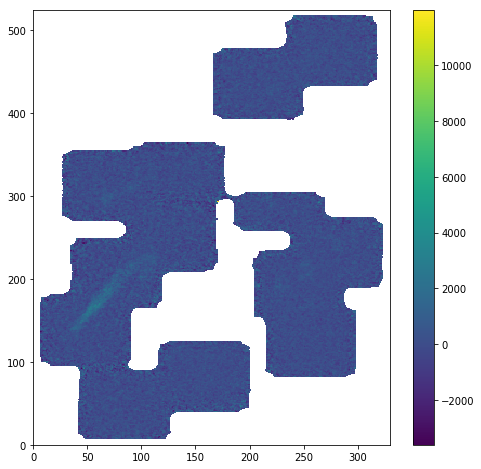

In [14]:
M_0 = zeroth(data, d_v)
plt.figure(figsize=(8,8))
plt.pcolormesh(M_0)
plt.colorbar()
plt.show()

In [15]:
def first(data, rad_v):
    """
    Calculate first moment for a data set.
    
    Parameters:
    
    data - 3d array
    rad_v - 1d array, units: m/s
    
    Returns:

    M_1 - 2d array
    """
    
    return (np.dot(data.T, rad_v)/np.sum(data.T, axis=2)).T

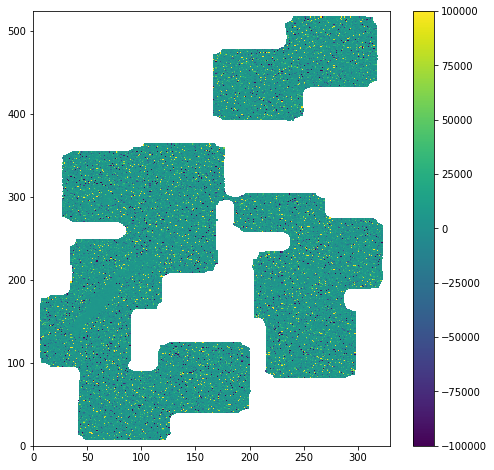

In [22]:
M_1 = first(data, rad_v)
plt.figure(figsize=(8,8))
plt.pcolormesh(M_1, vmax=1e5, vmin=-1e5)
plt.colorbar()
plt.show()

In [26]:
M_1.T[60][180], M_2.T[60][180]

(6051.786867747048, 3600.5133210833587)

In [23]:
def second(data, rad_v, M_1):
    """
    Calculate second moment for a data set.
    
    Parameters:
    
    data - 3d array
    rad_v - 1d array, units: m/s
    M_1 - 2d array
    
    Returns:
    
    M_2 - 2d array
    """
    
    M_2 = np.zeros([data.T.shape[0], data.T.shape[1]])
    for i in range(M_2.shape[0]):
        for j in range(M_2.shape[1]):
            spec = int_pix(data, i, j)
            M_2[i][j] = np.sqrt(np.dot((rad_v-M_1.T[i][j])**2, spec)/np.sum(spec))
    
    return M_2.T

In [20]:
M_2 = second(data, rad_v, M_1)


/Users/simonsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


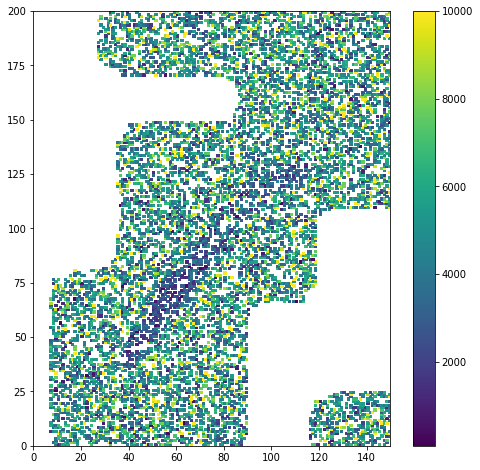

In [36]:
plt.figure(figsize=(8,8))
plt.pcolormesh(M_2[100:300, :150], vmax=1e4)
plt.colorbar()
plt.show()